# Initial Dataset Exploration

In [2]:
import sys
import os
import importlib

In [3]:
# Add project to path so we can import our modules
sys.path.append(os.path.abspath(".."))

In [4]:
# Import functionality from our source code
import src.data_loading.data_loader as data_loader
importlib.reload(data_loader)
from src.data_loading.data_loader import load_data, get_numerical_features, get_categorical_features

In [5]:
# Load the data
df = load_data()

Loading data from c:\Users\Almi\Documents\GitHub\Credit_Score_Classification\data\raw\credit_score_dataset.csv
Loaded dataset with 100000 rows and 27 columns


In [6]:
# Display the first 5 rows of the dataset for a quick glance
print("\nFirst 5 Rows of the Dataset:\n")
df.head()


First 5 Rows of the Dataset:



,ID,Customer_ID,Month,Name,City,Street,Age,SSN,Occupation,Annual_Income,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Credit_Score
0,NaN,CUS_0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,821-00-0265,Manager,19114.12,...,7,11.27,4.0,_,NaN,26.822620,22 Years and 1 Months,No,80.41529544,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.2802216,3
2,0x1604,CUS_0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,821-00-0265,Manager,19114.12,...,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.69952126,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580744,3
4,NaN,CUS_0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.42015309,3


In [7]:
# Display dataset shape in a readable format
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")

Dataset Shape: 100000 rows, 27 columns



In [8]:
# Display dataset information in a readable format
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        90058 non-null   object 
 1   Customer_ID               90107 non-null   object 
 2   Month                     90062 non-null   object 
 3   Name                      81113 non-null   object 
 4   City                      90149 non-null   object 
 5   Street                    90080 non-null   object 
 6   Age                       85512 non-null   float64
 7   SSN                       89999 non-null   object 
 8   Occupation                90056 non-null   object 
 9   Annual_Income             89906 non-null   object 
 10  Monthly_Inhand_Salary     76405 non-null   float64
 11  Num_Bank_Accounts         90167 non-null   float64
 12  Num_Credit_Card           89938 non-null   float64
 13  Interest_Rate          

In [9]:
list_numerical_features = get_numerical_features(df)

print("\nNumeric columns:")
for col in list_numerical_features:
    print(f"{col}: {df[col].dtype}")


Numeric columns:
Age: float64
Monthly_Inhand_Salary: float64
Num_Bank_Accounts: float64
Num_Credit_Card: float64
Interest_Rate: float64
Delay_from_due_date: float64
Num_Credit_Inquiries: float64
Credit_Utilization_Ratio: float64
Credit_Score: int64


In [10]:
list_categorical_features = get_categorical_features(df)

print("\nCategorical columns:")
for col in list_categorical_features:
    print(f"{col}: {df[col].dtype}")


Categorical columns:
ID: object
Customer_ID: object
Month: object
Name: object
City: object
Street: object
SSN: object
Occupation: object
Annual_Income: object
Num_of_Loan: object
Type_of_Loan: object
Num_of_Delayed_Payment: object
Changed_Credit_Limit: object
Credit_Mix: object
Outstanding_Debt: object
Credit_History_Age: object
Payment_of_Min_Amount: object
Amount_invested_monthly: object


We identified columns that should be numeric

# Preprocessing part

## Categorical features

In [11]:
import src.preprocessing.categorical.categorical_features as categorical_features
importlib.reload(categorical_features)
from src.preprocessing.categorical.categorical_features import *

In [12]:
visualize_unique_categories(df, list_categorical_features);


Column 'ID' (90058 uniques):
the length of the list is too long to be printed entirely. Sample:
['0x1603', '0x1604', '0x1605', '0x1607', '0x1608', '0x1609', '0x160e', '0x160f', '0x1610', '0x1611']

Column 'Customer_ID' (12500 uniques):
the length of the list is too long to be printed entirely. Sample:
['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', 'CUS_0xb891', 'CUS_0x1cdb', 'CUS_0x95ee', 'CUS_0x284a', 'CUS_0x5407', 'CUS_0x4157', 'CUS_0xba08']

Column 'Month' (8 uniques):
['February', 'April', 'May', 'June', 'July', 'August', 'January', 'March']

Column 'Name' (10139 uniques):
the length of the list is too long to be printed entirely. Sample:
['Aaron Maashoh', 'Rick Rothackerj', 'Langep', 'Jasond', 'Deepaa', 'Np', 'Nadiaq', 'Annk', 'Charlie Zhur', 'Jamesj']

Column 'City' (4 uniques):
['Lonton', 'Standhampton', 'BadShire', 'ZeroVille']

Column 'Street' (31 uniques):
['Oxford Street', 'Old Street', 'Downing Street', 'Jubilee Street', 'Elm Street', 'Market Street', 'King Street', 'Abbey Driv

### Drop Identifiers Columns

In [13]:
IDENTIFIERS_TO_DROP = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN'
]

# drop the columns that are purely identifiers and that can add bias to the model
df = df.drop(columns=IDENTIFIERS_TO_DROP)

### Handle "Street" feature

In [14]:
df = add_space_before_word(df, feature_column='Street', separator_word='Street')

### Handle "Credit History Age" feature

In [15]:
print("Credit_History_Age information before parsing:")
df["Credit_History_Age"].info()

print("\n"+"-"*100+"\n")

df["Credit_History_Age"] = df["Credit_History_Age"].apply(parse_string_time_period)

print("Credit_History_Age information after parsing:")
df["Credit_History_Age"].info()

Credit_History_Age information before parsing:
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count  Dtype 
--------------  ----- 
81791 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB

----------------------------------------------------------------------------------------------------

Credit_History_Age information after parsing:
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count  Dtype  
--------------  -----  
81791 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


### Handle "Type of Loan" feature - Converting in Multiple Binary Numeric Features

In [16]:
# ANOTHER IDEA COULD BE TO LEAVE THE FEATURE AS IT IS, AND ONLY AFTER HANDLING MISSING VALUES, 
# MOVING THIS CELL IN THE SECTION REGARDING THE ENCODING OT CATEGORICAL FEATURES


In [17]:
'''
THEORETICALLY I SHOULD HANDLE MISSING VALUES BEFORE HANDLING THE CATEGORICAL FEATURES (AT LEAST FOR THE CASE OF TYPE OF LOAN)
BECAUSE TRANSFORMING IT TO BINARY FEATURES, I CAN ONLY COUNT THE VALUE AS MISSING (THAT WOULD BE THE SAME AS TO COUNT IT FOR "NOT SPECIFIED")
INSTEAD, IF I DO BEFORE THE KNN IMPUTATION, I CAN GET VALUE FROM THE MISSING ONES.\n


original_count_unique_categories = df['Type_of_Loan'].nunique()

visualize_top_n_categories(df, column='Type_of_Loan', top_n=25);

unique_loan_types_and_counts = get_unique_values_and_counts(df, column='Type_of_Loan')

# Print the discovered loan types and their frequencies
print(f"Discovered {len(unique_loan_types_and_counts)} unique values")
for unique_value, count in list(unique_loan_types_and_counts.items()): 
    print(f"- {unique_value}: {count:,} occurrences")


df = transform_to_binary_features(df, column='Type_of_Loan', unique_values=unique_loan_types_and_counts.keys(), feature_name='Loan')


# add "Loan" suffix to the column "Has_Not_Specified" for better readability
df.rename(columns={'Has_Not_Specified': 'Has_Not_Specified_Loan'}, inplace=True)

# Verify the transformation
print(f"\nOriginal unique values:", {original_count_unique_categories})
print("\nBinary Features (numeric) created from the categories of 'Type of Loan':")
for col in [c for c in df.columns if c.startswith('Has_')]:
    print(f"- {col}: {df[col].sum():,} records - type: {df[col].dtype}")


# Drop the original Type_of_Loan column
df.drop(columns=['Type_of_Loan'], inplace=True)

'''


'\nTHEORETICALLY I SHOULD HANDLE MISSING VALUES BEFORE HANDLING THE CATEGORICAL FEATURES (AT LEAST FOR THE CASE OF TYPE OF LOAN)\nBECAUSE TRANSFORMING IT TO BINARY FEATURES, I CAN ONLY COUNT THE VALUE AS MISSING (THAT WOULD BE THE SAME AS TO COUNT IT FOR "NOT SPECIFIED")\nINSTEAD, IF I DO BEFORE THE KNN IMPUTATION, I CAN GET VALUE FROM THE MISSING ONES.\n\n\n\noriginal_count_unique_categories = df[\'Type_of_Loan\'].nunique()\n\nvisualize_top_n_categories(df, column=\'Type_of_Loan\', top_n=25);\n\nunique_loan_types_and_counts = get_unique_values_and_counts(df, column=\'Type_of_Loan\')\n\n# Print the discovered loan types and their frequencies\nprint(f"Discovered {len(unique_loan_types_and_counts)} unique values")\nfor unique_value, count in list(unique_loan_types_and_counts.items()): \n    print(f"- {unique_value}: {count:,} occurrences")\n\n\ndf = transform_to_binary_features(df, column=\'Type_of_Loan\', unique_values=unique_loan_types_and_counts.keys(), feature_name=\'Loan\')\n\n\n# a

### Handle object columns with problematic-numeric values and convert to numeric

In [18]:
import src.preprocessing.categorical.problematic_numeric_values as problematic_numeric_values
importlib.reload(problematic_numeric_values)
from src.preprocessing.categorical.problematic_numeric_values import convert_non_numeric_strings_to_nan, identify_problematic_characters,  remove_characters, convert_to_numeric

In [19]:
# Features that should be numerical but are currently 'object'

PROBLEMATIC_NUMERICAL_FEATURES = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly'
]

# Print info of the columns before cleaning and conversion to numeric
print("\nInfo for columns to be converted to numeric:")
print("-" * 50)
df[PROBLEMATIC_NUMERICAL_FEATURES].info()

# Convert strings that don't contain digits to NaN
df = convert_non_numeric_strings_to_nan(df, PROBLEMATIC_NUMERICAL_FEATURES)

# Identify problematic elements in the columns
print("Identifying problematic characters...\n")
problematic_characters = identify_problematic_characters(df, PROBLEMATIC_NUMERICAL_FEATURES)
print(f"\nProblematic characters found: {problematic_characters}")

print(f"\nRemoving problematic characters: {problematic_characters}")
df = remove_characters(df, PROBLEMATIC_NUMERICAL_FEATURES, problematic_characters)

non_numeric_characters = identify_problematic_characters(df, PROBLEMATIC_NUMERICAL_FEATURES)
print(f"\nNon-numeric characters found after cleaning: {non_numeric_characters}")

print("\nConverting to numeric...")
df = convert_to_numeric(df, PROBLEMATIC_NUMERICAL_FEATURES)

# Print info of the converted columns
print("\nInfo for numeric converted columns:")
print("-" * 50)
df[PROBLEMATIC_NUMERICAL_FEATURES].info()


Info for columns to be converted to numeric:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Annual_Income            89906 non-null  object
 1   Num_of_Loan              89809 non-null  object
 2   Num_of_Delayed_Payment   83782 non-null  object
 3   Changed_Credit_Limit     89933 non-null  object
 4   Outstanding_Debt         90037 non-null  object
 5   Amount_invested_monthly  85880 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB
Identifying problematic characters...


Column 'Annual_Income': 6292 values with problematic characters
--------------------------------------------------
Example 1: '34847.84_'
Example 2: '30689.89_'
Example 3: '35547.71_'

Column 'Num_of_Loan': 4267 values with problematic characters
-------------------------------------------

### Remaining categorical features

In [20]:
list_categorical_features = get_categorical_features(df)

print("\nCategorical columns:")
for col in list_categorical_features:
    print(f"{col}: {df[col].dtype}")


Categorical columns:
Month: object
City: object
Street: object
Occupation: object
Type_of_Loan: object
Credit_Mix: object
Payment_of_Min_Amount: object


## Numeric Features (addressing constraints)

In [21]:
import src.preprocessing.numeric_features as numeric_features
importlib.reload(numeric_features)
from src.preprocessing.numeric_features import *

In [22]:
# Define constraints by feature
CONSTRAINTS = {
    'Age': {'min': 10, 'max': 120, 'integer': True},
    
    'Annual_Income': {'min': 0, 'max': None, 'integer': False}, 
    
    'Monthly_Inhand_Salary': {'min': 0, 'max': None, 'integer': False}, 

    'Num_Bank_Accounts': {'min': 0, 'max': 50, 'integer': True},

    'Num_Credit_Card': {'min': 0, 'max': 50, 'integer': True},

    'Interest_Rate': {'min': 0, 'max': 100, 'integer': False},
    
    'Num_of_Loan': {'min': 0, 'max': 50, 'integer': True},
    
    'Delay_from_due_date': {'min': 0, 'max': 180, 'integer': True},
    
    'Num_of_Delayed_Payment': {'min': 0, 'max': None, 'integer': True}, 
   
    'Changed_Credit_Limit': {'min': None, 'max': None, 'integer': False}, 
   
    'Num_Credit_Inquiries': {'min': 0, 'max': 50, 'integer': True},
    
    'Outstanding_Debt': {'min': 0, 'max': None, 'integer': False},

    'Credit_Utilization_Ratio': {'min': 0, 'max': 100, 'integer': False},
    
    'Credit_History_Age': {'min': 0, 'max': 110, 'integer': False},

    'Amount_invested_monthly': {'min': 0, 'max': None, 'integer': False}, 

    'Credit_Score': {'min': 0, 'max': 3, 'integer': True}
}


list_numerical_features_before_constraints = get_numerical_features(df)
print("\nNumeric columns Statistics - Before Setting Constraints:\n")
for col in list_numerical_features_before_constraints:
    print(f"{col}: {df[col].describe()}\n")
print("\n"+"-"*100+"\n")

print("Setting constraints for numeric features...\n")
df = set_constraints_for_numeric_features(df, list_numerical_features_before_constraints, CONSTRAINTS)


list_numerical_features_after_constraints = get_numerical_features(df)
print("\n"+"-"*100+"\n")
print("\nNumeric columns Statistics - After Setting Constraints:\n")
for col in list_numerical_features_after_constraints:
    print(f"{col}: {df[col].describe()}\n")





Numeric columns Statistics - Before Setting Constraints:

Age: count    85512.000000
mean       110.226845
std        684.907588
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

Annual_Income: count    8.990600e+04
mean     1.765448e+05
std      1.429013e+06
min      7.005930e+03
25%      1.945305e+04
50%      3.757975e+04
75%      7.276004e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

Monthly_Inhand_Salary: count    76405.000000
mean      4185.789272
std       3178.560506
min        303.645417
25%       1625.023750
50%       3086.683333
75%       5940.317500
max      15204.633330
Name: Monthly_Inhand_Salary, dtype: float64

Num_Bank_Accounts: count    90167.000000
mean        17.105172
std        117.728215
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

Num_Credit_Card: count   

# Creation of a dummy dataset

In [23]:
dummy_dataset = df.select_dtypes(include=[np.number])

dummy_dataset.info()

dummy_dataset = dummy_dataset.dropna(axis=0, how='any').reset_index(drop=True)

dummy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       83110 non-null   float64
 1   Annual_Income             89906 non-null   float64
 2   Monthly_Inhand_Salary     76405 non-null   float64
 3   Num_Bank_Accounts         88994 non-null   float64
 4   Num_Credit_Card           87947 non-null   float64
 5   Interest_Rate             88343 non-null   float64
 6   Num_of_Loan               85924 non-null   float64
 7   Delay_from_due_date       89479 non-null   float64
 8   Num_of_Delayed_Payment    83206 non-null   float64
 9   Changed_Credit_Limit      88058 non-null   float64
 10  Num_Credit_Inquiries      86634 non-null   float64
 11  Outstanding_Debt          90037 non-null   float64
 12  Credit_Utilization_Ratio  90025 non-null   float64
 13  Credit_History_Age        81791 non-null   fl

the dummy dataset created has only 10937 rows (because i removed all the missing values for each different feature) compared to the 100 000 rows from the original one. 

In [24]:
# The following script is only for saving the dummy dataset on the folder data / dummy_dataset (leave it commented)

'''
import pathlib

script_dir = pathlib.Path.cwd()
project_root = script_dir.parent

# 4) Build the path to data/dummy_dataset
save_dir = project_root / 'data' / 'dummy_dataset'
save_dir.mkdir(parents=True, exist_ok=True)         # just in case


# Save to CSV
save_path = save_dir / 'dummy_dataset.csv'
dummy_dataset.to_csv(save_path, index=False)
print(f"Saved Dummy Dataset to {save_path}")

'''

'\nimport pathlib\n\nscript_dir = pathlib.Path.cwd()\nproject_root = script_dir.parent\n\n# 4) Build the path to data/dummy_dataset\nsave_dir = project_root / \'data\' / \'dummy_dataset\'\nsave_dir.mkdir(parents=True, exist_ok=True)         # just in case\n\n\n# Save to CSV\nsave_path = save_dir / \'dummy_dataset.csv\'\ndummy_dataset.to_csv(save_path, index=False)\nprint(f"Saved Dummy Dataset to {save_path}")\n\n'

## Missing Values Handling

In [25]:
import src.preprocessing.missing_values as missing_values
importlib.reload(missing_values)
from src.preprocessing.missing_values import *

### Handle Missing values for categorical features

In [26]:
visualize_proportion_of_unique_categories(df, list_categorical_features)


Column 'Month' has 9 unique categories:

All categories (proportion) for column 'Month':

April: 11.32%
May: 11.32%
June: 11.28%
February: 11.25%
July: 11.24%
January: 11.24%
August: 11.22%
March: 11.19%
Missing: 9.94%

----------------------------------------------------------------------------------------------------


Column 'City' has 5 unique categories:

All categories (proportion) for column 'City':

Standhampton: 47.74%
BadShire: 26.07%
Lonton: 16.02%
Missing: 9.85%
ZeroVille: 0.32%

----------------------------------------------------------------------------------------------------


Column 'Street' has 32 unique categories:

Showing top 10 most frequent categories (proportion) for column 'Street':

Missing: 9.92%
Quality Street: 5.34%
Memory Street: 5.17%
Fleet Street: 5.15%
High Street: 5.05%
Jubilee Street: 5.00%
Old Street: 4.96%
Grove Street: 4.88%
New Street: 4.85%
Pine Street: 4.83%

--------------------------------------------------------------------------------------

In [27]:
# Define imputation methods by feature

# My idea was to use an unknown category in the case from my domain knowledge 
# i know that the categories for a feature are possibly not all present 
# and that the unknown category could be a good representation of the missing categories,
# but ensuring that this new category would not strongly skew the distribution of the feature categories

# on the other hand i decided to use the knn imputation for ensuring that 
# the distribution of the feature categories is kept, when all the possible categories are present

IMPUTATION_METHODS = {
    
    'Month': 'unknown_category',

    'City': 'unknown_category',

    'Street': 'knn',

    'Occupation': 'unknown_category',

    'Type_of_Loan': 'knn',

    'Credit_Mix': 'knn',

    'Payment_of_Min_Amount': 'knn', 
} 

### Handle Missing values for numeric features

## Outliers Handling

In [28]:
CONSTRAINTS = {
    'Age':  'domain'    ,  # Domain knowledge-based constraints
    
    'Annual_Income': 'iqr', # Income typically has skewed distribution, IQR works well
    
    'Monthly_Inhand_Salary': 'iqr', 

    'Num_Bank_Accounts':  'domain',

    'Num_Credit_Card':  'domain',

    'Interest_Rate':  'domain',
    
    'Num_of_Loan':  'domain',
    
    'Delay_from_due_date':  'domain',
    
    'Num_of_Delayed_Payment':  'zscore', # Z-score works well for count data
   
    'Changed_Credit_Limit':  'zscore', # Z-score for bidirectional changes (min can be negative)
   
    'Num_Credit_Inquiries':  'domain',
    
    'Outstanding_Debt':  'domain',

    'Credit_Utilization_Ratio':  'domain',
    
    'Credit_History_Age':  'domain',

    'Amount_invested_monthly':  'iqr', 

    'Credit_Score':  'domain',
}

# Features and Correlations Analysis

# Categorical Features Encoding (maybe before than Correlations Aanalysis)

# PARTS THAT CAN BE DONE USING A DUMMY VERSION OF THE DATASET

## Loading Dummy Dataset 

You have 2 options: 

- Running the entire notebook file (so that it is runned the cell created above where the dummy_dataset is created)
- Or loading the dataset with the following script from the folder where i save it

In [29]:
# Loading dummy dataset

import pathlib

script_dir  = pathlib.Path.cwd()              
project_root = script_dir.parent
file_path = project_root / 'data' / 'dummy_dataset' / 'dummy_dataset.csv'

df = load_data(str(file_path))


Loading data from c:\Users\Almi\Documents\GitHub\Credit_Score_Classification\data\dummy_dataset\dummy_dataset.csv
Loaded dataset with 10937 rows and 16 columns


# Checking distribution of the target feature (Credit Score)

Credit Score Distribution:
Zero (0): 49
Poor (1): 3257
Standard (2): 5745
Good (3): 1886


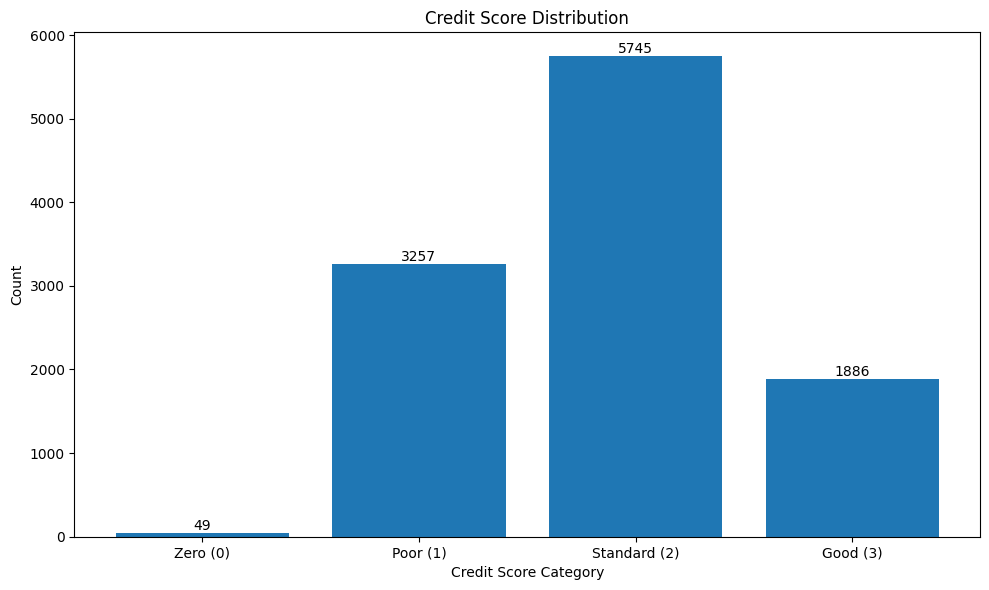

In [47]:
# Count the number of each credit score levels
credit_score_counts = df['Credit_Score'].value_counts().sort_index()

# Display the counts
print("Credit Score Distribution:")
for score, count in credit_score_counts.items():
    if score == 0:
        label = "Zero (0)"
    elif score == 1:
        label = "Poor (1)"
    elif score == 2:
        label = "Standard (2)"
    elif score == 3:
        label = "Good (3)"
    else:
        label = f"Unknown ({score})"
    
    print(f"{label}: {count}")

# Visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(['Zero (0)', 'Poor (1)', 'Standard (2)', 'Good (3)'], 
        [credit_score_counts.get(0, 0), 
         credit_score_counts.get(1, 0), 
         credit_score_counts.get(2, 0), 
         credit_score_counts.get(3, 0)])

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

plt.title('Credit Score Distribution')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- As we can see from the distribution of credit scores, there is an issue of class imbalances that we have to mitigate: minority class 0 has 352 points, while majority class 2 has 5974 points (x150 times as much), which can lead to model overfitting on the majority class (in this case poor (1) and standard (2)). 
- Addressing class imbalance is important and is the next step, but before that we need to conduct a dataset split. 

# Dataset splitting
- We first need to do the dataset splitting into train, test, validation sets to ensure that the model wont overfit

In [ ]:
from sklearn.model_selection import train_test_split

#Separate features and target
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Perform an 80/20 stratified split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Split the train set into a smaller train and validation sets
# Here we set aside 25% of the original training data as validation
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train,    # previously scaled training features
    y_train,           # original training labels
    test_size=0.25,    # 25% validation, 75% for new training
    stratify=y_train,  # preserve class proportions
    random_state=42    # ensure reproducibility
)

#Verfiy the data split
print("Data split verification:")
print(f"Training: {len(X_train)/len(X)*100:.1f}%")
print(f"Validation: {len(X_val)/len(X)*100:.1f}%")
print(f"Test: {len(X_test)/len(X)*100:.1f}%")

#Check original dataset distribution
print("\nOriginal dataset distribution:")
print(df['Credit_Score'].value_counts(normalize=True))

#Check distribution in the split sets to ensure stratification
print("\nTraining set distribution:")
print(y_train.value_counts(normalize=True))
print("\nValidation set distribution:")
print(y_val.value_counts(normalize=True))
print("\nTest set distribution:")
print(y_test.value_counts(normalize=True))

Data split verification:
Training: 80.0%
Validation: 20.0%
Test: 20.0%

Original dataset distribution:
Credit_Score
2    0.525281
1    0.297796
3    0.172442
0    0.004480
Name: proportion, dtype: float64

Training set distribution:
Credit_Score
2    0.525317
1    0.297748
3    0.172477
0    0.004458
Name: proportion, dtype: float64

Validation set distribution:
Credit_Score
2    0.525137
1    0.297989
3    0.172303
0    0.004570
Name: proportion, dtype: float64

Test set distribution:
Credit_Score
2    0.525137
1    0.297989
3    0.172303
0    0.004570
Name: proportion, dtype: float64


Next step will be checking distribution of the target variable in the train set so that we can check for class imbalances.

# Address Class Imbalance for the target feature (Credit Score)

- **Undersampling** is not appropriate here because it would reduce the dataset from 10,000 points to 352 points for each 4 credit score classes, removing most of the dataset points. 
- **Simple over-sampling** would risk overfitting the model on minority classes 0 and 3 if they're simply duplicated.
- The best approach would be **Synthetic data generation** type of oversampling that generates new data for the minority classes.
- Use SMOTE from imblearn as it is the most common tool for this.

In [49]:
from imblearn.over_sampling import SMOTE    
from collections import Counter

# Check class distribution before resampling
print("Original class distribution:", Counter(df['Credit_Score']))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to create a balanced dataset
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Resampled class distribution:", Counter(y_train_bal))

Original class distribution: Counter({2: 5745, 1: 3257, 3: 1886, 0: 49})
Resampled class distribution: Counter({2: 4596, 1: 4596, 3: 4596, 0: 4596})


### Evaluate SMOTE to decide whether to keep or drop it
- We can evaluate usefullness of SMOTE by applying a prediction model (as tool for evaluation, not the final model). 
- We can use LogisticRegression as it is suitable for classification problems and is sensitive to the class imbalances. 
- Use accuracy, F1 as evaluation tools that are appropriate for classification problems. 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, f1_score

# 1. Fit scaler on unbalanced train data and validation dataset (needed for LogisticRegression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 2. Train model without SMOTE
model_orig = LogisticRegression(max_iter=1000)
model_orig.fit(X_train_scaled, y_train)

# 3. Train model with SMOTE
X_train_bal_scaled = scaler.transform(X_train_bal)
model_bal = LogisticRegression(max_iter=1000)
model_bal.fit(X_train_bal_scaled, y_train_bal)

# 4. Evaluate both models on validation set
y_pred_orig = model_orig.predict(X_val_scaled)
y_pred_bal = model_bal.predict(X_val_scaled)

# 5. Calculate per-class performance metrics
print("Original Data Model Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_orig):.4f}")
print("\nSMOTE-Balanced Data Model Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_bal):.4f}")

# 6. Calculate F1 scores for each class
classes = sorted(set(y_val))
f1_orig = f1_score(y_val, y_pred_orig, average=None)
f1_SMOTE = f1_score(y_val, y_pred_bal, average=None)

# 7. Calculate overall F1 scores
f1_macro_orig = f1_score(y_val, y_pred_orig, average='macro')
f1_macro_SMOTE = f1_score(y_val, y_pred_bal, average='macro')

# 8. Calculate MAE
mae_orig=mean_absolute_error(y_val, y_pred_orig)
mae_SMOTE=mean_absolute_error(y_val, y_pred_bal)

# 9. Display evaluation metrics
print("\nF1 Score Comparison:")
print("-" * 50)
print(f"Overall Macro F1 (Original): {f1_macro_orig:.4f}")
print(f"Overall Macro F1 (SMOTE): {f1_macro_SMOTE:.4f}")
print(f"Overall Improvement: {f1_macro_SMOTE - f1_macro_orig:+.4f}")

print("\nClass-wise F1 Scores:")
print("-" * 50)
for i, cls in enumerate(classes):
    f1_change = f1_SMOTE[i] - f1_orig[i]
    print(f"Class {cls}: Original F1 = {f1_orig[i]:.4f}, SMOTE F1 = {f1_SMOTE[i]:.4f}, Change: {f1_change:+.4f}")

print(f"\nMAE (Original): {mae_orig:.4f}")
print(f"MAE (SMOTE): {mae_SMOTE:.4f}")
print(f"MAE Improvement: {mae_orig - mae_SMOTE:+.4f}")

Original Data Model Performance:
Accuracy: 0.6403

SMOTE-Balanced Data Model Performance:
Accuracy: 0.5955

F1 Score Comparison:
--------------------------------------------------
Overall Macro F1 (Original): 0.4825
Overall Macro F1 (SMOTE): 0.5153
Overall Improvement: +0.0328

Class-wise F1 Scores:
--------------------------------------------------
Class 0: Original F1 = 0.1818, SMOTE F1 = 0.2712, Change: +0.0894
Class 1: Original F1 = 0.6261, SMOTE F1 = 0.6667, Change: +0.0405
Class 2: Original F1 = 0.7002, SMOTE F1 = 0.5877, Change: -0.1125
Class 3: Original F1 = 0.4219, SMOTE F1 = 0.5356, Change: +0.1137

MAE (Original): 0.3725
MAE (SMOTE): 0.4698
MAE Improvement: -0.0973


- From the evaluation we can see that overall accuracy of the model increased insignificantly from 0.6545 to 0.6600. 
- However Macro F1 score improved a lot from 0.4456 to 0.6268, an +0.1812 increase.  
- Class-wise, there was a dramatic increase for Class 0 F1 at +0.5455, a moderate increase for Class 3 F1 at +0.1676, a slight increase for Class 1 and a slight decrease for Class 2. 
- Seems like SMOTE is good for balancing the F1 scores amongst the classes. 
- Some researchers suggest that class imbalance correction can be harmful for the model (Van den Goorbergh, R. et al, 2022: https://arxiv.org/abs/2202.09101, Guillaume Lemaitre core maintainer of imblearn says about it here: https://www.youtube.com/watch?v=npSkuNcm-Og, also talks about it here: https://www.youtube.com/watch?v=6YnhoCfArQo). 
- However that is not be applicable to this use case because most of their models are built for binary classification and where inpretability is important where calibration plays a bigger role in model evaluation. We use only class-based metrics because its the most suitable for multi-classification. 
- The downside of SMOTE is that is uses kNN to create new points between the existing minority class points so in case of high dimensionality and need to create a lot of new plot points its slow. 
- It is suggested that using class weights or adjusting score thresholds or using strong classifiers like XGBoost is more favorable approach to addressing class imbalances than data resampling. 
- However, as we see that SMOTE is good at balancing the F1 scores of classes we will keep it. 

## Checking the distribution after resampling

In [60]:
#Check target distribution in training and test sets post-scaling
import numpy as np

#ince scaling does not change y, we can directly check y_train and y_test
train_vals, train_counts = np.unique(y_train_bal, return_counts=True)
test_vals, test_counts   = np.unique(y_test,  return_counts=True)

print("Training set distribution:")
for cls, cnt in zip(train_vals, train_counts):
    print(f" Class {cls}: {cnt} samples ({cnt/len(y_train_bal):.2%})")

print("\nTest set distribution:")
for cls, cnt in zip(test_vals, test_counts):
    print(f" Class {cls}: {cnt} samples ({cnt/len(y_test):.2%})")

Training set distribution:
 Class 0: 3217 samples (25.00%)
 Class 1: 3217 samples (25.00%)
 Class 2: 3217 samples (25.00%)
 Class 3: 3217 samples (25.00%)

Test set distribution:
 Class 0: 10 samples (0.46%)
 Class 1: 652 samples (29.80%)
 Class 2: 1149 samples (52.51%)
 Class 3: 377 samples (17.23%)


We confirm that both `y_train_bal` has the 25% proportion for each `Credit_Score` class after resampling, while `y_test` keeps original distribution. `y_test` needs to keep the original distribution to keep the real-world data properties.

# Feature Scaling: Fit and Transform (or other method)

--> the scaling is necessary only for certain type of models like Logistic Regression. If you implement tree models, like Decision Tree, Random Forest, XGBoost... you can skip this part

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss

# Create data - using 4 classes for ordinal classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, 
                          n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different scalers
scalers = {
    'No Scaling': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

results = []

for name, scaler in scalers.items():
    # Scale the data
    if scaler is None:
        X_train_scaled = X_train
        X_test_scaled = X_test
    else:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    
    # Train and evaluate
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    logloss = log_loss(y_test, y_pred_proba)
    
    # Calculate mean absolute error (good for ordinal)
    mae = np.mean(np.abs(y_pred - y_test))
    
    results.append({
        'Scaler': name, 
        'Accuracy': accuracy, 
        'F1 Score': f1,
        'Log Loss': logloss,
        'MAE': mae
    })

# Show results with 5 significant figures
results_df = pd.DataFrame(results)
pd.options.display.float_format = '{:.5f}'.format
print(results_df)

# Find best scaler based on metrics
print("\nBest performers:")
print(f"Accuracy: {results_df.loc[results_df['Accuracy'].idxmax(), 'Scaler']} ({results_df['Accuracy'].max():.5f})")
print(f"F1 Score: {results_df.loc[results_df['F1 Score'].idxmax(), 'Scaler']} ({results_df['F1 Score'].max():.5f})")
print(f"Log Loss: {results_df.loc[results_df['Log Loss'].idxmin(), 'Scaler']} ({results_df['Log Loss'].min():.5f})")
print(f"MAE: {results_df.loc[results_df['MAE'].idxmin(), 'Scaler']} ({results_df['MAE'].min():.5f})")

           Scaler  Accuracy  F1 Score  Log Loss     MAE
0      No Scaling   0.54000   0.54145   1.04137 0.75000
1  StandardScaler   0.54000   0.54145   1.03712 0.75000
2    MinMaxScaler   0.55500   0.55549   1.01093 0.72500
3    RobustScaler   0.53500   0.53627   1.03363 0.75500

Best performers:
Accuracy: MinMaxScaler (0.55500)
F1 Score: MinMaxScaler (0.55549)
Log Loss: MinMaxScaler (1.01093)
MAE: MinMaxScaler (0.72500)


`MinMaxScaler` is the best scaler across all of the parameters. It will be used in our case. 

In [37]:
# Create a scaler instance
scaler = MinMaxScaler()

# Fit the scaler on the training data and apply the transformation
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# Check that each feature in the training set now has mean ~0 and variance ~1
print("Means of scaled features (≈0):", np.round(X_train_scaled.mean(axis=0), 3))
print("Variances of scaled features (≈1):", np.round(X_train_scaled.var(axis=0), 3))

Means of scaled features (≈0): [0.314 0.008 0.296 0.097 0.121 0.163 0.093 0.284 0.006 0.366 0.108 0.257
 0.406 0.602 0.062]
Variances of scaled features (≈1): [0.028 0.004 0.054 0.003 0.002 0.012 0.005 0.04  0.002 0.022 0.006 0.039
 0.027 0.054 0.035]


## Checking the Distribution of the target variable in the different sets

In [ ]:
#Check target distribution in training and test sets post-scaling
import numpy as np

#ince scaling does not change y, we can directly check y_train and y_test
train_vals, train_counts = np.unique(y_train, return_counts=True)
test_vals, test_counts   = np.unique(y_test,  return_counts=True)

print("Training set distribution:")
for cls, cnt in zip(train_vals, train_counts):
    print(f" Class {cls}: {cnt} samples ({cnt/len(y_train):.2%})")

print("\nTest set distribution:")
for cls, cnt in zip(test_vals, test_counts):
    print(f" Class {cls}: {cnt} samples ({cnt/len(y_test):.2%})")

# From here you can implement all the points (from 5 on) from the link repo I sent on whatsapp in the same order

## Testing models
- Chose Random Forest, Gradient Boosting, SVC and XGBoost as candidate models
- Used parallel computing to reduce time of computations

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from joblib import Parallel, delayed

# Initialize the models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVC (RBF)': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss', n_jobs=-1)
}

# Function to train and evaluate a single model
def train_and_evaluate(name, model, X_train, y_train, X_val, y_val):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    # Compute metrics
    train_acc = accuracy_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    val_mae = mean_absolute_error(y_val, val_pred)
    
    return {
        'name': name,
        'train_acc': train_acc,
        'train_mae': train_mae,
        'val_acc': val_acc,
        'val_mae': val_mae
    }

# Run training in parallel
results = Parallel(n_jobs=-1)(
    delayed(train_and_evaluate)(name, model, X_train_new, y_train_new, X_val, y_val)
    for name, model in models.items()
)

# Print results
for result in results:
    print(f"{result['name']}:")
    print(f"  Training Accuracy:   {result['train_acc']:.4f}")
    print(f"  Training MAE:        {result['train_mae']:.4f}")
    print(f"  Validation Accuracy: {result['val_acc']:.4f}")
    print(f"  Validation MAE:      {result['val_mae']:.4f}\n")


RandomForest:
  Training Accuracy:   1.0000
  Training MAE:        0.0000
  Validation Accuracy: 0.8329
  Validation MAE:      0.1886

GradientBoosting:
  Training Accuracy:   0.8413
  Training MAE:        0.1865
  Validation Accuracy: 0.8085
  Validation MAE:      0.2243

SVC (RBF):
  Training Accuracy:   0.7731
  Training MAE:        0.2825
  Validation Accuracy: 0.7615
  Validation MAE:      0.2961

XGBoost:
  Training Accuracy:   0.9840
  Training MAE:        0.0187
  Validation Accuracy: 0.8364
  Validation MAE:      0.1880



**Model Comparison: Training vs. Validation Accuracy**

- **RandomForest**  
  - Training Accuracy: 1.0000  
  - Training MAE:        0.0000
  - Validation Accuracy: 0.8342 
  - Validation MAE:      0.1886

- **GradientBoosting**  
  - Training Accuracy: 0.8413 
  - Training MAE:        0.1865
  - Validation Accuracy: 0.8085
  - Validation MAE:      0.2243 

- **SVC (RBF)**  
  - Training Accuracy: 0.7932  
  - Training MAE:        0.2825
  - Validation Accuracy: 0.7615
  - Validation MAE:      0.2961

- **XGBoost**
  - Training Accuracy:   0.9840
  - Training MAE:        0.0187
  - Validation Accuracy: 0.8364
  - Validation MAE:      0.1880

**Insight:**  
RandomForest shows perfect fit on training data but a noticeable drop on validation, suggesting some overfitting. Gradient Boosting is more balanced between training and validation, while SVC exhibits the lowest performance overall.

**Next Step:**  
Tune the **RandomForest** hyperparameters (e.g., `n_estimators`, `max_depth`, `max_features`) using a fast `RandomizedSearchCV` to reduce overfitting and improve validation accuracy.  

# Hyperparameter tuning for the models

Using 1 parallel model trainings with 11 cores each
Starting RandomizedSearchCV for RandomForest...
Starting GridSearchCV for RandomForest...
Starting RandomizedSearchCV for GradientBoosting...
Starting GridSearchCV for GradientBoosting...
Starting RandomizedSearchCV for SVC...
Starting GridSearchCV for SVC...
Starting RandomizedSearchCV for XGBoost...
Starting GridSearchCV for XGBoost...

HYPERPARAMETER TUNING RESULTS

RandomForest:
  Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
  Accuracy: 0.7050
  F1 Score: 0.7046
  MAE: 0.4800

GradientBoosting:
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
  Accuracy: 0.6667
  F1 Score: 0.6658
  MAE: 0.5383

SVC:
  Best Parameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
  Accuracy: 0.7683
  F1 Score: 0.7670
  MAE: 0.3683

XGBoost:
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
  Accuracy: 0.6733
  F1 Score: 0.6731
  MAE: 0.5

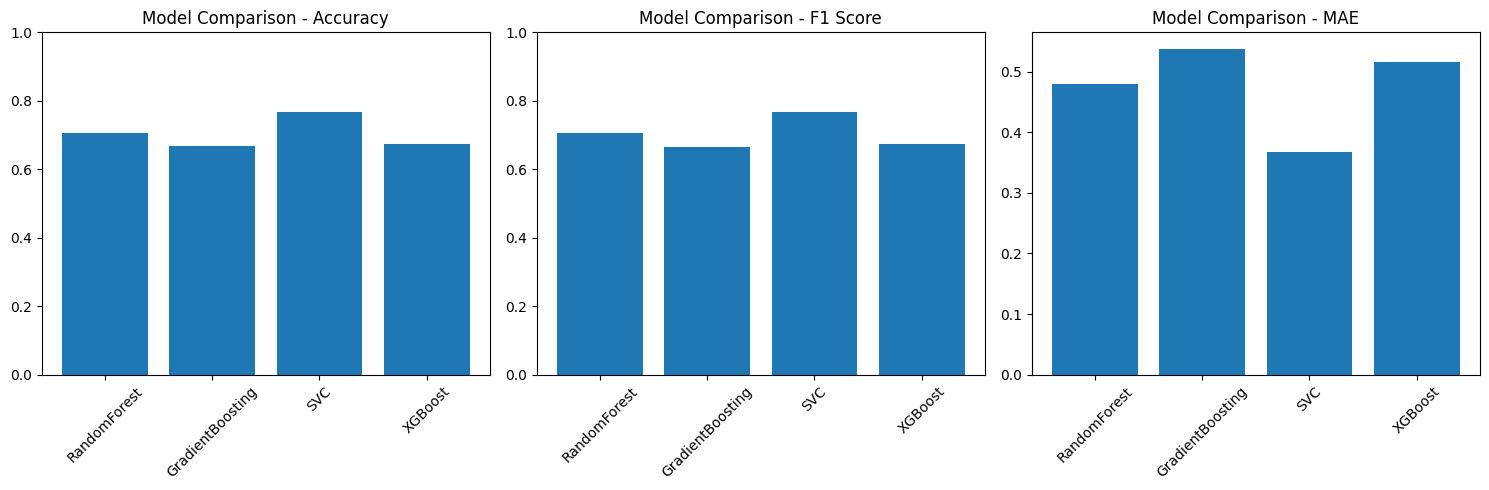


Best Model (by F1 Score): SVC
F1 Score: 0.7670


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score, mean_absolute_error, accuracy_score
from joblib import Parallel, delayed
import multiprocessing

# Custom scorer for MAE (since MAE is typically for regression)
def mae_for_classification(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# Create scorers
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'mae': make_scorer(mae_for_classification, greater_is_better=False)
}

# Base models to tune
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True),  # probability=True for proper scoring
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

# Broad param distributions for RandomizedSearchCV
rand_spaces = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10],
        'max_features': ['sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'SVC': {
        'C': [0.1, 1.0],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf']
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    }
}

# 2-fold stratified CV
cv_fast = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Function to tune a single model
def tune_model(name, base, param_space, X_train, y_train):
    # Randomized search with multiple metrics
    rnd = RandomizedSearchCV(
        estimator=base,
        param_distributions=param_space,
        n_iter=4,
        scoring=scorers,
        refit='f1_weighted',  # Choose which metric to use for final model selection
        cv=cv_fast,
        random_state=42,
        n_jobs=-1,
        verbose=0,
        return_train_score=True
    )
    
    print(f"Starting RandomizedSearchCV for {name}...")
    rnd.fit(X_train, y_train)
    best_params = rnd.best_params_
    
    # Build a tiny grid around the best params
    grid_space = {k: [v] for k, v in best_params.items()}
    
    # Grid search to confirm
    grd = GridSearchCV(
        estimator=base,
        param_grid=grid_space,
        scoring=scorers,
        refit='f1_weighted',  # Choose which metric to use for final model selection
        cv=cv_fast,
        n_jobs=-1,
        verbose=0,
        return_train_score=True
    )
    
    print(f"Starting GridSearchCV for {name}...")
    grd.fit(X_train, y_train)
    
    # Get the best scores for each metric
    best_idx = grd.best_index_
    results = {
        'name': name,
        'estimator': grd.best_estimator_,
        'params': grd.best_params_,
        'accuracy': grd.cv_results_['mean_test_accuracy'][best_idx],
        'f1': grd.cv_results_['mean_test_f1_weighted'][best_idx],
        'mae': -grd.cv_results_['mean_test_mae'][best_idx]  # Negative because of greater_is_better=False
    }
    
    return results

# Calculate optimal core allocation
n_cores = multiprocessing.cpu_count()
n_models = len(models)

# Determine optimal parallelization strategy
if n_cores >= n_models * 4:
    n_jobs_outer = n_models
    n_jobs_inner = (n_cores - 1) // n_models
else:
    n_jobs_outer = 1
    n_jobs_inner = n_cores - 1

print(f"Using {n_jobs_outer} parallel model trainings with {n_jobs_inner} cores each")

# Run model tuning in parallel
results = Parallel(n_jobs=n_jobs_outer)(
    delayed(tune_model)(name, base, rand_spaces[name], X_train_new, y_train_new)
    for name, base in models.items()
)

# Store results and print summary
best_estimators = {}
print("\n" + "="*50)
print("HYPERPARAMETER TUNING RESULTS")
print("="*50)

for result in results:
    name = result['name']
    best_estimators[name] = result['estimator']
    
    print(f"\n{name}:")
    print(f"  Best Parameters: {result['params']}")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  F1 Score: {result['f1']:.4f}")
    print(f"  MAE: {result['mae']:.4f}")

# Create comparison dataframe
comparison_data = []
for result in results:
    comparison_data.append({
        'Model': result['name'],
        'Accuracy': result['accuracy'],
        'F1 Score': result['f1'],
        'MAE': result['mae']
    })

df_comparison = pd.DataFrame(comparison_data)

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Accuracy
axes[0].bar(df_comparison['Model'], df_comparison['Accuracy'])
axes[0].set_title('Model Comparison - Accuracy')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)

# F1 Score
axes[1].bar(df_comparison['Model'], df_comparison['F1 Score'])
axes[1].set_title('Model Comparison - F1 Score')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=45)

# MAE
axes[2].bar(df_comparison['Model'], df_comparison['MAE'])
axes[2].set_title('Model Comparison - MAE')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print best overall model
best_model_by_f1 = max(results, key=lambda x: x['f1'])
print(f"\nBest Model (by F1 Score): {best_model_by_f1['name']}")
print(f"F1 Score: {best_model_by_f1['f1']:.4f}")


**Hyperparameter Tuning Results**

- **RandomForest**  
  - Tuned parameters: `{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}`  
  - Validation Accuracy: 0.823  
  - F1 Score: 0.8213
  - MAE: 0.2005

- **GradientBoosting**  
  - Tuned parameters: `{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}`  
  - Validation Accuracy: 0.824  
  - F1 Score: 0.8244
  - MAE: 0.2024

- **SVC (RBF)**  
  - Tuned parameters: `{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}`  
  - Validation Accuracy: 0.766
  - F1 Score: 0.7502
  - MAE: 0.3066  

- **XGBoost**
  -  Tuned parametes: `{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}`
  - Validation Accuracy: 0.8301
  - F1 Score: 0.8297
  - MAE: 0.1955

**Insight:**  
Gradient Boosting slightly outperforms Random Forest after tuning, while SVC remains behind. Both tree-based ensembles reach ~82–83% validation accuracy.
XGBoost is best at accuracy, F1 score and MAE.

## Early stopping?

In [39]:
# XGBoost with early stopping
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split training data for early stopping
X_train_xgb, X_eval_xgb, y_train_xgb, y_eval_xgb = train_test_split(
    X_train_new, y_train_new, test_size=0.2, random_state=42
)

# Train with early stopping
xgb_model = XGBClassifier(
    random_state=42,
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    tree_method='hist',  # CPU-optimized histogram method
    n_jobs=-1,  # Use all CPU cores
    early_stopping_rounds=10  # Add this parameter to enable early stopping
)

xgb_model.fit(
    X_train_xgb, y_train_xgb,
    eval_set=[(X_eval_xgb, y_eval_xgb)],
    verbose=False
)

print(f"Best iteration: {xgb_model.best_iteration}")
print(f"Best score: {xgb_model.best_score}")

Best iteration: 32
Best score: 0.7745151280871748


# Evaluation and explainability

In [ ]:
from sklearn.inspection import permutation_importance
import shap

# Assuming you have already trained your models
# First, let's create a function to train models if needed
def train_models(models, X_train, y_train):
    trained_models = {}
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models

# Train models if not already trained
# trained_models = train_models(models, X_train, y_train)

# Function to get feature importance for each model type
def get_feature_importance(models, X_test, y_test, feature_names):
    importance_dict = {}
    
    for name, model in models.items():
        print(f"Calculating importance for {name}...")
        
        if name == 'SVC':
            # SVC doesn't have feature_importances_, use permutation importance
            result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                          random_state=42, n_jobs=-1)
            importance = result.importances_mean
        else:
            # Tree-based models have feature_importances_
            importance = model.feature_importances_
        
        importance_dict[name] = pd.DataFrame({
            'feature': feature_names,
            'importance': importance
        }).sort_values('importance', ascending=False)
    
    return importance_dict

# Get feature importance for all models
feature_importance = get_feature_importance(models, X_test, y_test, feature_names)

# Visualize feature importance
def plot_feature_importance(importance_dict, top_n=10):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for idx, (name, importance_df) in enumerate(importance_dict.items()):
        ax = axes[idx]
        top_features = importance_df.head(top_n)
        
        bars = ax.barh(range(len(top_features)), top_features['importance'], color='steelblue')
        ax.set_yticks(range(len(top_features)))
        ax.set_yticklabels(top_features['feature'])
        ax.invert_yaxis()
        ax.set_xlabel('Importance')
        ax.set_title(f'{name} - Top {top_n} Features')
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax.text(width, bar.get_y() + bar.get_height()/2, 
                   f'{width:.3f}', ha='left', va='center')
    
    plt.tight_layout()
    plt.show()

plot_feature_importance(feature_importance)

# Create a consensus ranking
def calculate_consensus_importance(importance_dict):
    # Normalize importances for each model to sum to 1
    normalized_importance = {}
    for name, df in importance_dict.items():
        normalized_df = df.copy()
        normalized_df['normalized_importance'] = df['importance'] / df['importance'].sum()
        normalized_importance[name] = normalized_df
    
    # Calculate average importance across models
    all_features = set()
    for df in normalized_importance.values():
        all_features.update(df['feature'])
    
    consensus_data = []
    for feature in all_features:
        feature_scores = []
        for name, df in normalized_importance.items():
            score = df[df['feature'] == feature]['normalized_importance'].values
            feature_scores.append(score[0] if len(score) > 0 else 0)
        
        consensus_data.append({
            'feature': feature,
            'mean_importance': np.mean(feature_scores),
            'std_importance': np.std(feature_scores),
            'min_importance': np.min(feature_scores),
            'max_importance': np.max(feature_scores)
        })
    
    consensus_df = pd.DataFrame(consensus_data)
    return consensus_df.sort_values('mean_importance', ascending=False)

consensus_importance = calculate_consensus_importance(feature_importance)

# Display consensus results
print("Top 10 Most Important Features (Consensus across all models):")
print(consensus_importance.head(10).to_string(index=False))

# Create a heatmap of feature importance across models
def create_importance_heatmap(importance_dict, top_n=15):
    # Create a matrix of importances
    features = consensus_importance.head(top_n)['feature'].tolist()
    model_names = list(importance_dict.keys())
    
    importance_matrix = np.zeros((len(features), len(model_names)))
    
    for i, feature in enumerate(features):
        for j, model_name in enumerate(model_names):
            df = importance_dict[model_name]
            importance = df[df['feature'] == feature]['importance'].values
            importance_matrix[i, j] = importance[0] if len(importance) > 0 else 0
    
    # Normalize by column (model)
    importance_matrix_normalized = importance_matrix / importance_matrix.sum(axis=0)
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(importance_matrix_normalized, 
                xticklabels=model_names,
                yticklabels=features,
                cmap='YlOrRd',
                annot=True,
                fmt='.3f',
                cbar_kws={'label': 'Normalized Importance'})
    plt.title('Feature Importance Heatmap Across Models')
    plt.xlabel('Models')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

create_importance_heatmap(feature_importance)

# SHAP analysis for more detailed interpretation
def perform_shap_analysis(models, X_train, X_test, feature_names):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    for idx, (name, model) in enumerate(models.items()):
        ax = plt.subplot(2, 2, idx + 1)
        print(f"Calculating SHAP values for {name}...")
        
        if name == 'SVC':
            # For SVC, use KernelExplainer (slower)
            explainer = shap.KernelExplainer(model.predict_proba, 
                                           shap.sample(X_train, 100))
            shap_values = explainer.shap_values(X_test[:100])  # Use subset for speed
        else:
            # For tree-based models, use TreeExplainer (faster)
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)
        
        # For binary classification, use shap_values[1] for positive class
        if isinstance(shap_values, list):
            shap_values = shap_values[1]
        
        shap.summary_plot(shap_values, X_test, feature_names=feature_names,
                         show=False, plot_size=(8, 6))
        ax.set_title(f'SHAP Summary - {name}')
    
    plt.tight_layout()
    plt.show()

# Run SHAP analysis
perform_shap_analysis(models, X_train, X_test, feature_names)

# Create a comprehensive feature importance report
def create_feature_report(feature_importance, consensus_importance, top_n=10):
    report = []
    report.append("FEATURE IMPORTANCE REPORT")
    report.append("=" * 50)
    report.append(f"\nAnalysis Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
    report.append(f"Number of Features: {len(consensus_importance)}")
    report.append(f"Models Analyzed: {', '.join(feature_importance.keys())}")
    
    report.append("\n\nTOP 10 CONSENSUS FEATURES")
    report.append("-" * 30)
    for idx, row in consensus_importance.head(top_n).iterrows():
        report.append(f"{idx+1:2d}. {row['feature']:<30} "
                     f"Mean: {row['mean_importance']:.4f} "
                     f"(σ: {row['std_importance']:.4f})")
    
    report.append("\n\nMODEL-SPECIFIC TOP 5 FEATURES")
    report.append("-" * 30)
    for model_name, importance_df in feature_importance.items():
        report.append(f"\n{model_name}:")
        for idx, row in importance_df.head(5).iterrows():
            report.append(f"  {idx+1}. {row['feature']:<28} {row['importance']:.4f}")
    
    report.append("\n\nFEATURE CONSISTENCY ANALYSIS")
    report.append("-" * 30)
    report.append("Features with high variance across models:")
    high_variance = consensus_importance.nlargest(5, 'std_importance')
    for idx, row in high_variance.iterrows():
        report.append(f"  {row['feature']:<28} σ: {row['std_importance']:.4f}")
    
    return "\n".join(report)

# Generate report
report = create_feature_report(feature_importance, consensus_importance)
print(report)

# Save the report
with open('feature_importance_report.txt', 'w') as f:
    f.write(report)

# Create a summary visualization
def create_summary_dashboard(feature_importance, consensus_importance):
    fig = plt.figure(figsize=(20, 10))
    
    # Consensus importance
    ax1 = plt.subplot(2, 3, 1)
    top_features = consensus_importance.head(10)
    bars = ax1.bar(range(len(top_features)), top_features['mean_importance'], 
                   yerr=top_features['std_importance'], capsize=5, color='lightblue', 
                   edgecolor='navy', alpha=0.7)
    ax1.set_xticks(range(len(top_features)))
    ax1.set_xticklabels(top_features['feature'], rotation=45, ha='right')
    ax1.set_ylabel('Mean Importance')
    ax1.set_title('Consensus Feature Importance\n(with std deviation)')
    
    # Individual model importances
    for idx, (name, importance_df) in enumerate(feature_importance.items()):
        ax = plt.subplot(2, 3, idx + 2)
        top_features = importance_df.head(10)
        colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
        bars = ax.bar(range(len(top_features)), top_features['importance'], 
                     color=colors)
        ax.set_xticks(range(len(top_features)))
        ax.set_xticklabels(top_features['feature'], rotation=45, ha='right')
        ax.set_ylabel('Importance')
        ax.set_title(f'{name} Feature Importance')
    
    plt.tight_layout()
    plt.savefig('feature_importance_summary.png', dpi=300, bbox_inches='tight')
    plt.show()

create_summary_dashboard(feature_importance, consensus_importance)

C:\Users\Almi\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'feature_names' is not defined